<a href="https://colab.research.google.com/github/akhilvallala/First_Project/blob/master/Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},inplace=True)
df.drop(df.columns[[0,-1,-2]].values,axis=1,inplace=True)

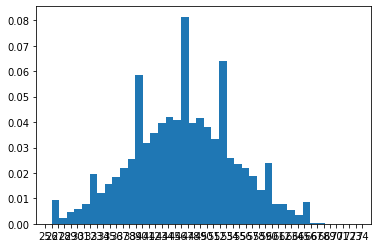

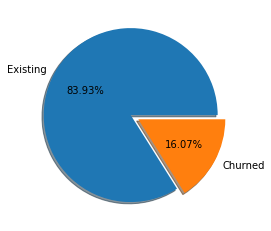

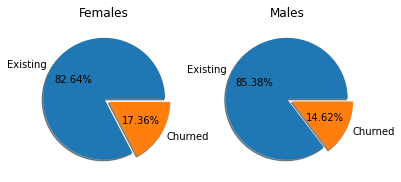

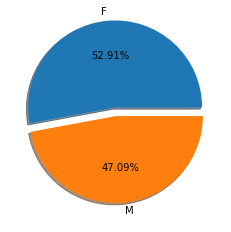

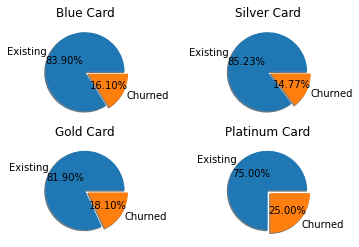

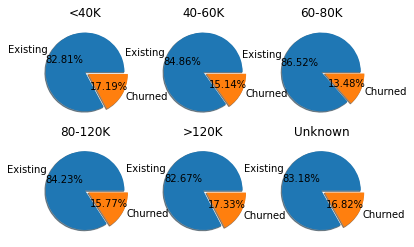

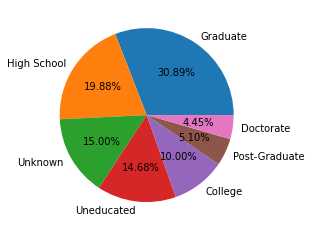

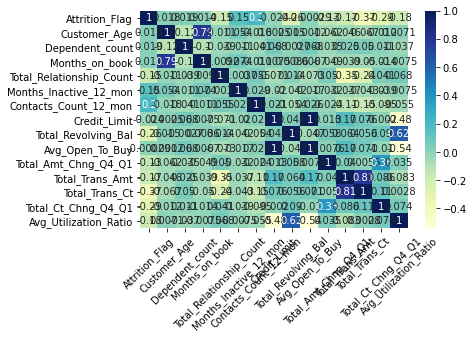

In [6]:
#------------Exploratory Data Analysis---------------------
plt.hist(df['Customer_Age'],bins=40,density=True)    # age follows normal curve
plt.xticks(range(25,75,1))
plt.show()

sizes = (df['Attrition_Flag'].value_counts()).tolist()
plt.pie(sizes,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
plt.show()

#______gender based division
sizes_f = df.loc[df['Gender']=='F']['Attrition_Flag'].value_counts()
sizes_m = df.loc[df['Gender']=='M']['Attrition_Flag'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax2.title.set_text('Males')
plt.show()

sizes_gender = df['Gender'].value_counts()    #not much difference. thus it's eually distributed.
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',labels=sizes_gender.index.values,explode=[0.1,0],shadow=True)
plt.show()

#______card category based
sizes_b = df.loc[df['Card_Category']=='Blue']['Attrition_Flag'].value_counts().tolist()
sizes_s = df.loc[df['Card_Category']=='Silver']['Attrition_Flag'].value_counts().tolist()
sizes_g = df.loc[df['Card_Category']=='Gold']['Attrition_Flag'].value_counts().tolist()
sizes_p = df.loc[df['Card_Category']=='Platinum']['Attrition_Flag'].value_counts().tolist()
fig,((axs0, axs1), (axs2, axs3)) = plt.subplots(2,2)
axs0.pie(sizes_b,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs0.title.set_text('Blue Card')
axs1.pie(sizes_s,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs1.title.set_text('Silver Card')
axs2.pie(sizes_g,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs2.title.set_text('Gold Card')
axs3.pie(sizes_p,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs3.title.set_text('Platinum Card')
plt.show()

#______income category based

sizes_0 = df.loc[df['Income_Category']=='Less than $40K']['Attrition_Flag'].value_counts().tolist()
sizes_40 = df.loc[df['Income_Category']=='$40K - $60K']['Attrition_Flag'].value_counts().tolist()
sizes_60 = df.loc[df['Income_Category']=='$60K - $80K']['Attrition_Flag'].value_counts().tolist()
sizes_80 = df.loc[df['Income_Category']=='$80K - $120K']['Attrition_Flag'].value_counts().tolist()
sizes_120 = df.loc[df['Income_Category']=='$120K +']['Attrition_Flag'].value_counts().tolist()
sizes_unkn = df.loc[df['Income_Category']=='Unknown']['Attrition_Flag'].value_counts().tolist()

fig,((axs0, axs1, axs2), (axs3, axs4, axs5)) = plt.subplots(2,3)
axs0.pie(sizes_0,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs0.title.set_text('<40K')
axs1.pie(sizes_40,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs1.title.set_text('40-60K')
axs2.pie(sizes_60,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs2.title.set_text('60-80K')
axs3.pie(sizes_80,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs3.title.set_text('80-120K')
axs4.pie(sizes_120,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs4.title.set_text('>120K')
axs5.pie(sizes_unkn,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs5.title.set_text('Unknown')
plt.show()

#-----education based----
sizes_edu = df['Education_Level'].value_counts()
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()
#
# #-------------------correlation between numeric variables and target--------------
numeric_data = df.select_dtypes(include=[np.number])
corr_numeric = numeric_data.corr()
sns.heatmap(corr_numeric,cmap="YlGnBu",annot=True)
plt.xticks(rotation=45)
plt.show()

#Dropping the columns which are highly co-related

In [7]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.drop('Months_on_book',axis=1,inplace=True)
df.drop('Avg_Open_To_Buy',axis=1,inplace=True)
# df.drop('Total_Trans_Ct',axis=1,inplace=True)
# df.columns

In [9]:
# #--------------let's convert some categorical variables into numerical--------------
# #ordinal to numerical
map_education_level = {'High School':1,'Graduate':3,'Uneducated':0,'College':2,'Post-Graduate':4,'Doctorate':5}
map_income_level = {'$60K - $80K':3,'Less than $40K':1, '$80K - $120K':4,'$40K - $60K':2,'$120K +':5}
map_card_category = {'Blue':1,'Gold':3,'Silver':2,'Platinum':4}
df['Education_Level'].replace(map_education_level,inplace=True)
df['Income_Category'].replace(map_income_level,inplace=True)
df['Card_Category'].replace(map_card_category,inplace=True)

#
# #hot encoding of gender category
df.insert(2,'Gender_M',df['Gender'],True)
df.rename({'Gender':'Gender_F'},axis=1,inplace=True)
df['Gender_M'].replace({'M':1,'F':0},inplace=True)
df['Gender_F'].replace({'M':0,'F':1},inplace=True)
#
# #hot encoding of marital status
df.insert(7,'Single',df['Marital_Status'],True)
df.insert(7,'Divorced',df['Marital_Status'],True)
df.insert(7,'Unknown',df['Marital_Status'],True)
df.rename({'Marital_Status':'Married'},axis=1,inplace=True)
df['Married'].replace({'Single':0, 'Married':1, 'Divorced':0, 'Unknown':0},inplace=True)
df['Single'].replace({'Single':1, 'Married':0, 'Divorced':0, 'Unknown':0},inplace=True)
df['Divorced'].replace({'Single':0, 'Married':0, 'Divorced':1, 'Unknown':0},inplace=True)
df['Unknown'].replace({'Single':0, 'Married':0, 'Divorced':0, 'Unknown':1},inplace=True)

df.head()

,Attrition_Flag,Customer_Age,Gender_M,Gender_F,Dependent_count,Education_Level,Married,Unknown,Divorced,Single,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,0,3,1,1,0,0,0,3,1,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,0,1,5,3,0,0,0,1,1,1,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,1,0,3,3,1,0,0,0,4,1,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,0,1,4,1,0,1,0,0,1,1,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,1,0,3,0,1,0,0,0,3,1,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


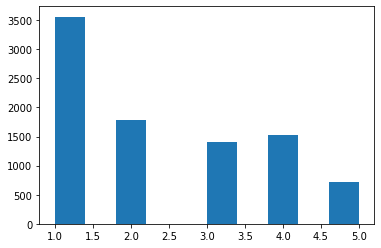

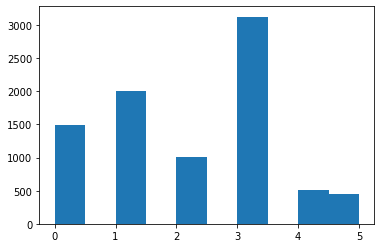

,Attrition_Flag,Customer_Age,Gender_M,Gender_F,Dependent_count,Education_Level,Married,Unknown,Divorced,Single,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,0,3,1.0,1,0,0,0,3.0,1,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,0,1,5,3.0,0,0,0,1,1.0,1,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,1,0,3,3.0,1,0,0,0,4.0,1,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,0,1,4,1.0,0,1,0,0,1.0,1,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,1,0,3,0.0,1,0,0,0,3.0,1,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [10]:
plt.hist(df.loc[df['Income_Category']!='Unknown']['Income_Category'])   # income is rightly skewed. so central value is median
plt.show()

plt.hist(df.loc[df['Education_Level']!='Unknown']['Education_Level'])   # education is normally distributed. so central value is mean
plt.show()

#Missing values in education column
educatedDF = df.loc[df['Education_Level']!='Unknown']
mean_education = educatedDF['Education_Level'].mean()
df['Education_Level'].replace({'Unknown':mean_education},inplace=True)

#Missing values in income column
salariedDF = df.loc[df['Income_Category']!='Unknown']
median_salaries = salariedDF['Income_Category'].median()
df['Income_Category'].replace({'Unknown':median_salaries},inplace=True)

df.head()

In [11]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#-----Upsampling----
from sklearn.utils import resample
from collections import Counter

print("Before Upsampling:-")
print(Counter(y_train))

# X_train_upsampled, y_train_upsampled = resample(x_train[y_train == 1],
#                                                 y_train[y_train == 1],
#                                                 replace=True,
#                                                 n_samples=x_train[y_train == 0].shape[0],
#                                                 random_state=123)


# Let's use SMOTE to oversample
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_upsampled, y_train_upsampled = oversample.fit_resample(x_train,y_train)

print("After Upsampling:-")
print(Counter(y_train_upsampled))

Before Upsampling:-
Counter({0: 5699, 1: 1086})
After Upsampling:-
Counter({0: 5699, 1: 5699})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
#-----Random Forest after upsampling------
print("\n\n\n\n AFTER UPSAMPLING\n\n")
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(x_train_upsampled, y_train_upsampled)
# Predicting result for training set and validation set
predict_val_rf = classifier.predict(x_test)


# Model Performance

print("Accuracy : ", accuracy_score(y_test, predict_val_rf) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf) *  100)
print(confusion_matrix(y_test, predict_val_rf))
print(classification_report(y_test, predict_val_rf))





 AFTER UPSAMPLING


Accuracy :  95.69120287253142
Recall :  84.84288354898337
Precision :  88.09980806142035
[[2739   62]
 [  82  459]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2801
           1       0.88      0.85      0.86       541

    accuracy                           0.96      3342
   macro avg       0.93      0.91      0.92      3342
weighted avg       0.96      0.96      0.96      3342



In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
pca_y = PCA(n_components=2)

In [17]:
pca.fit(x_train)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca_x_train = pca.transform(x_train)


In [23]:
pca.fit(x_test)
pca_x_test = pca.transform(x_test)

In [24]:
pca_x_train.shape

(6785, 2)

In [25]:
pca_x_test.shape

(3342, 2)

In [26]:
y_train.shape

(6785,)

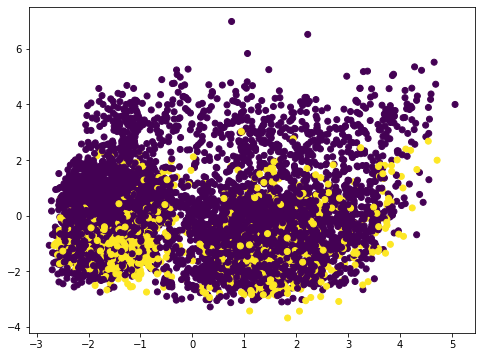

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(pca_x_train[:,0], pca_x_train[:,1], c = y_train)

In [28]:
#-----Random Forest after upsampling------
print("\n\n\n\n AFTER UPSAMPLING\n\n")
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(pca_x_train, y_train)
# Predicting result for training set and validation set
predict_val_rf = classifier.predict(pca_x_test)


# Model Performance

print("Accuracy : ", accuracy_score(y_test, predict_val_rf) *  100)
print("Recall : ", recall_score(y_test, predict_val_rf) *  100)
print("Precision : ", precision_score(y_test, predict_val_rf) *  100)
print(confusion_matrix(y_test, predict_val_rf))
print(classification_report(y_test, predict_val_rf))





 AFTER UPSAMPLING


Accuracy :  81.7474566128067
Recall :  12.014787430683919
Precision :  32.663316582914575
[[2667  134]
 [ 476   65]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2801
           1       0.33      0.12      0.18       541

    accuracy                           0.82      3342
   macro avg       0.59      0.54      0.54      3342
weighted avg       0.76      0.82      0.78      3342

